<a href="https://colab.research.google.com/github/Guner20/Movie-Recommendation-Algorithm/blob/main/Movie_Recommendation_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [25]:
cols = ['user_id', 'movie_id', 'rating', 'timestamp']
dataset=pd.read_csv('u.data',sep='\t', names=cols)
X=dataset.iloc[:, :2].values
y=dataset['rating'].values

In [26]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
X[:,0]=le1.fit_transform(X[:,0])
X[:,1]=le2.fit_transform(X[:,1])
X = X.astype(np.int32)
y = y.astype(np.float32)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
num_users=len(le1.classes_)
num_movies = len(le2.classes_)


user_input = keras.Input(shape=(1,))
movie_input = keras.Input(shape=(1,))

user_embedding = layers.Embedding(input_dim=num_users, output_dim=50)(user_input)
movie_embedding = layers.Embedding(input_dim=num_movies, output_dim=50)(movie_input)


user_vec = layers.Flatten()(user_embedding)
movie_vec = layers.Flatten()(movie_embedding)
concat = layers.Concatenate()([user_vec, movie_vec])


x = layers.Dense(128, activation='relu')(concat)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

model = keras.Model([user_input, movie_input], output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

history=model.fit([X_train[:, 0], X_train[:, 1]], y_train,
          validation_data=([X_test[:, 0], X_test[:, 1]], y_test),
          epochs=50, batch_size=64)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_9       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 1, 50)     │     47,150 │ input_layer_8[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 1, 50)     │     84,100 │ input_layer_9[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 50)        │          0 │ embedding_8[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 50)        │          0 │ embedding_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 100)       │          0 │ flatten_8[0][0],  │
│ (Concatenate)       │                   │            │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     12,928 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         65 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 152,499 (595.70 KB)

 Trainable params: 152,499 (595.70 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.4047 - mae: 1.1334 - val_loss: 0.9232 - val_mae: 0.7731
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8853 - mae: 0.7458 - val_loss: 0.8872 - val_mae: 0.7386
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8382 - mae: 0.7222 - val_loss: 0.8695 - val_mae: 0.7341
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8034 - mae: 0.7065 - val_loss: 0.8645 - val_mae: 0.7331
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7580 - mae: 0.6834 - val_loss: 0.8657 - val_mae: 0.7280
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7062 - mae: 0.6572 - val_loss: 0.8763 - val_mae: 0.7289
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6620 - mae: 0.6372 - val_loss: 0.8840 - val_mae: 0.7362
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6039 - mae: 0.6074 - val_loss: 0.9249 - val_mae: 0.7497
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

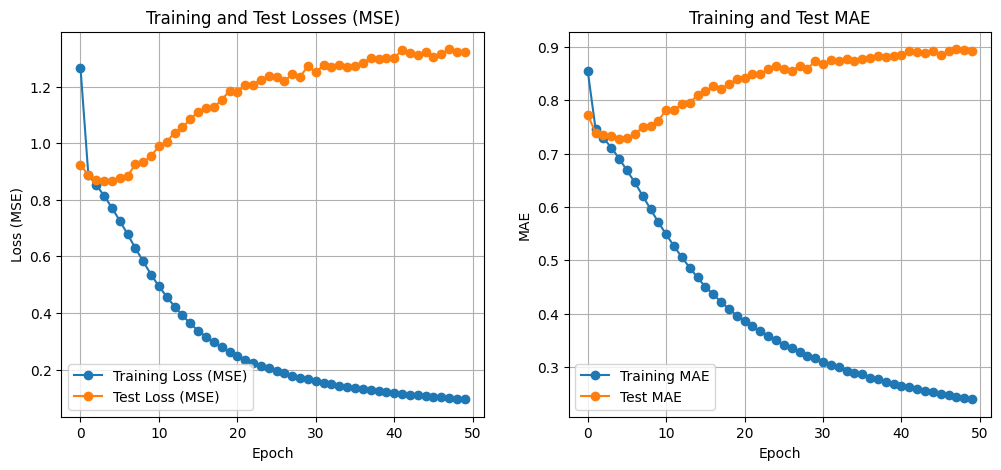

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Validation Loss (MSE)', marker='o')
plt.plot(history.history['val_loss'], label='Test Loss (MSE)', marker='o')
plt.title('Validation and Test Losses (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Validation MAE', marker='o')
plt.plot(history.history['val_mae'], label='Test MAE', marker='o')
plt.title('Validation and Test MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.show()

In [31]:
movie_titles = pd.read_csv('u.item',sep='|', encoding='latin-1', header=None, usecols=[0, 1],names=['movie_id', 'title'])

def recommend_movies(user_raw_id, model, movie_titles, top_n=10):
    user_encoded = le1.transform([user_raw_id])[0]
    all_movie_ids = np.arange(num_movies)


    predictions = model.predict([np.full(num_movies, user_encoded), all_movie_ids], verbose=0).flatten()

    user_rated_movies = dataset[dataset['user_id'] == user_raw_id]['movie_id'].values
    user_rated_movies_encoded = le2.transform(user_rated_movies)
    predictions[user_rated_movies_encoded] = -1


    top_movie_indices = predictions.argsort()[-top_n:][::-1]
    recommended_movie_ids = le2.inverse_transform(top_movie_indices)

    recommended_titles = movie_titles[movie_titles['movie_id'].isin(recommended_movie_ids)]
    return recommended_titles


user_raw_id = 7
print(f"Movie recommendations for user {user_raw_id}:")
recommendations = recommend_movies(user_raw_id, model, movie_titles, top_n=10)
print(recommendations)

Movie recommendations for user 7:
      movie_id                                              title
44          45                         Eat Drink Man Woman (1994)
58          59                           Three Colors: Red (1994)
223        224                                    Ridicule (1996)
275        276                           Leaving Las Vegas (1995)
320        321                                      Mother (1996)
701        702                                   Barcelona (1994)
747        748                                  Saint, The (1997)
771        772                                        Kids (1995)
949        950                                     Georgia (1995)
1004      1005  Double vie de Véronique, La (Double Life of Ve...
